In [1]:
import numpy as np, plottools as pl, healpy as hp, local, tools_cmb, binning as bn
from matplotlib.pyplot import *
import warnings
warnings.filterwarnings("ignore")

In [15]:
def plot_cmb_aps(aobj,cn):
    mb = bn.multipole_binning(70,lmin=100,lmax=2000)
    if cn in [3,6]:
        lfac = np.ones(aobj.lmax+1)
    else:
        lfac = aobj.lfac
    mcb, vcb, scb, ocb = bn.binned_spec(mb,aobj.fcmb.cl['c'],cn=cn,lfac=lfac)
    mnb, vnb, snb = bn.binned_spec(mb,aobj.fcmb.cl['n'],cn=cn,lfac=lfac,doreal=False)
    if cn==1: ymin, ymax = 0, 8e-10
    if cn==2: ymin, ymax = -1e-12, 6e-12
    if cn==3: ymin, ymax = -1e-18, 5e-18
    if cn==4: ymin, ymax = -2e-11, 2e-11
    if cn==5: ymin, ymax = -1e-12, 5e-12
    if cn==6: ymin, ymax = -5e-18, 5e-18
    pl.plot_1dstyle(fsize=[12,5],xmin=mb.lmin,xmax=mb.lmax,ymin=ymin,ymax=ymax)
    errorbar(mb.bc,ocb-mnb,yerr=vcb,fmt='o',label='data')
    plot(mb.bc,mcb-mnb,label='sim')
    if cn==3:
        plot(mb.bc,mnb*.1,label='noise sim x 0.1')
    else:
        plot(mb.bc,mnb,label='noise sim')
    if cn<=4: plot(aobj.l,lfac*aobj.lcl[cn-1,:],label='theory',color='k',ls='--')
    legend()
    show()

In [6]:
aobj = local.init_analysis(freq='100',dtype='full',wind='LG60')

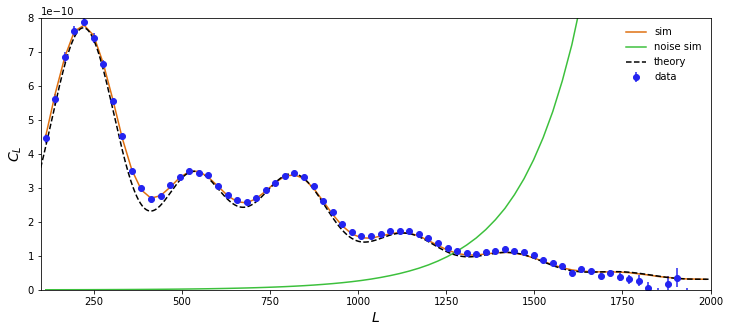

In [9]:
plot_cmb_aps(aobj,1)

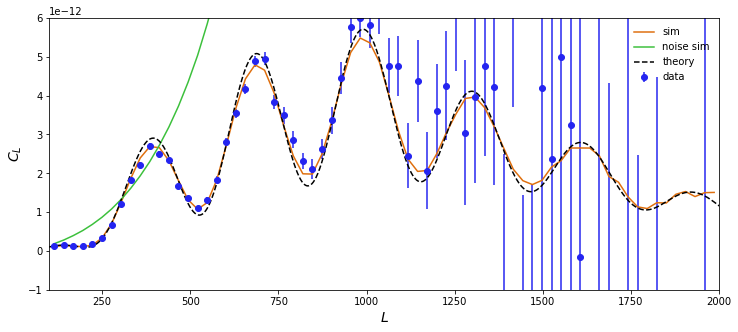

In [10]:
plot_cmb_aps(aobj,2)

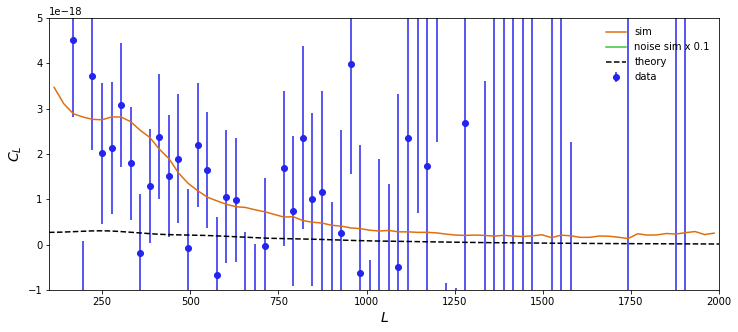

In [11]:
plot_cmb_aps(aobj,3)

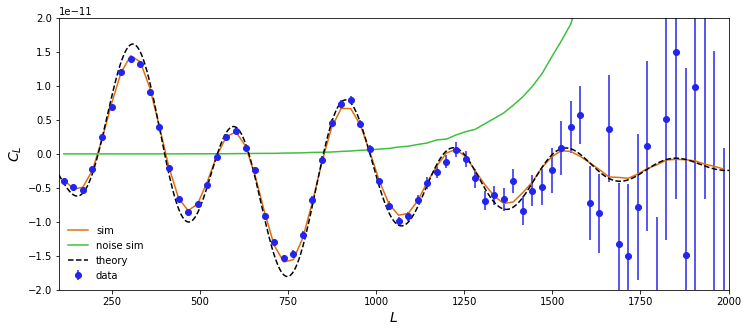

In [12]:
plot_cmb_aps(aobj,4)

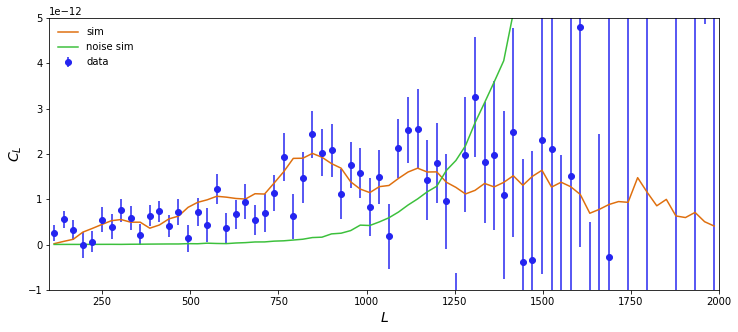

In [13]:
plot_cmb_aps(aobj,5)

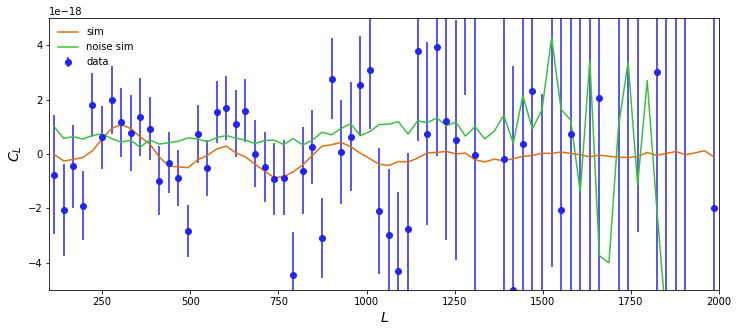

In [16]:
plot_cmb_aps(aobj,6)

In [17]:
bobj = local.init_analysis(freq='143',dtype='full',wind='LG60')

In [19]:
for cn in range(1,7):
    plot_cmb_aps(bobj,cn)

OSError: /global/cscratch1/sd/toshiyan/plk_biref/cmb/aps//rlz/cl_c_full_143_LG60_a1.0deg_none_00000.dat not found.